# Class 5/24/24 Notes #

In [1]:
import sklearn.datasets as skd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## KNN Example ##

(See last Monday's class for a discussion of KNN.)

### Generating a Data set ##

In [2]:
myX2, myy2 = skd.make_circles(n_samples = 250, noise=.19, factor = .5)

In [3]:
newX2 = np.transpose(myX2)

<AxesSubplot: >

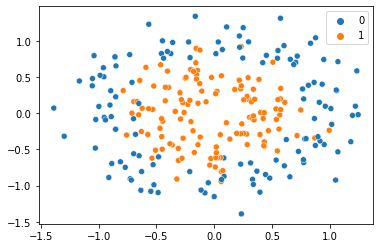

In [4]:
sns.scatterplot(x = newX2[0], y = newX2[1], hue = myy2)

**Note:** This will be hard to solve with a linear classifier . . . 

In [5]:
mydf = pd.DataFrame({'x': newX2[0], 'y': newX2[1], 'cat': myy2})

In [6]:
mydf.head(5)

,x,y,cat
0,-0.143057,0.590455,1
1,0.865560,0.426357,0
2,0.229702,0.337426,1
3,0.061025,-0.944174,1
4,-0.189390,0.594588,1


### The Train-Test Split ###

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_X, test_X, train_y, test_y = train_test_split(mydf[['x','y']], mydf[['cat']], test_size=0.25)

In [9]:
train_X.shape

(187, 2)

In [10]:
train_y.shape

(187, 1)

**Note:** train_y is not the right shape.  (It should be (187,).)  We have shown how to fix this with reshape.  np.ravel (used below) does the same thing.

### K Nearest Neighbor Classifier ###

**Idea:** This is the same 4-step procedure as with the other classifiers.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [13]:
neigh.fit(train_X, np.ravel(train_y))

KNeighborsClassifier(n_neighbors=3)

### Performance Measurements ###

In [14]:
predicted = neigh.predict(test_X)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [16]:
confusion_matrix(predicted, test_y)

array([[30,  3],
       [ 2, 28]])

In [17]:
accuracy_score(predicted, test_y)

0.9206349206349206

## k-NN Regression ##

**Idea:** As mentioned in class, this is the same as k-NN classification, except you take the average of the k-nearest values as your precicted y-value.

### A Regression Dataset ###

In [18]:
myxvals = np.random.uniform(low=-5, high=5, size=200)
myyvals = np.random.uniform(low=-5, high=5, size=200)
myzvals = 8 - 4*myxvals + 3*myyvals + np.random.normal(size=200)

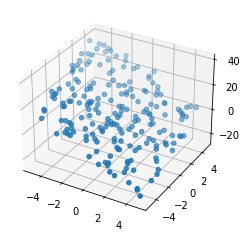

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(myxvals, myyvals, myzvals)

**Idea:** Calculate the average of of the K nearest neighbors for the numerical target. 

In [20]:
train_X, test_X, train_y, test_y = train_test_split(np.transpose([myxvals, myyvals]), myzvals, test_size=0.25)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
neigh = KNeighborsRegressor(n_neighbors = 3)

In [23]:
neigh.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=3)

In [24]:
predicted = neigh.predict(test_X)

### Measuring Sucess: ##

As with time series, we use values like Mean Squared Error (MSE), RMSE, MAE, etc . . . to measure the success of the algorithm.  Of course, the primary goal is to compare two different models, but the idea is the same. 

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [26]:
mean_squared_error(predicted, test_y)

2.6348267979268405

In [27]:
mean_absolute_error(predicted,test_y)

1.3103844647075653

## Decision Trees ##

See this [SKLearn page](https://scikit-learn.org/stable/modules/tree.html) for an overview and this [SKLearn page](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for a discussion of the specific command. 

This is also a [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) method for visualizing decisio trees.


Here's is a [good discussion](https://www.ibm.com/topics/decision-trees) of the idea behind the procedure.

In [40]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [41]:
mydata = pd.read_csv("https://raw.githubusercontent.com/aleahy-work/STAT223-S24/main/Data/penguins.csv")
mydata.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [42]:
print(mydata.shape)
mydata = mydata.dropna()
print(mydata.shape)

(344, 8)
(333, 8)


In [43]:
train_X, test_X, train_y, test_y = train_test_split(mydata[['bill_length_mm','body_mass_g']], mydata['species'])

In [44]:
train_X

,bill_length_mm,body_mass_g
226,46.4,4700.0
290,45.9,3575.0
246,44.5,4850.0
193,49.6,5700.0
125,40.6,4000.0
...,...,...
84,37.3,3350.0
215,54.3,5650.0
111,45.6,4600.0
126,38.8,3275.0


In [45]:
train_y

226       Gentoo
290    Chinstrap
246       Gentoo
193       Gentoo
125       Adelie
         ...    
84        Adelie
215       Gentoo
111       Adelie
126       Adelie
252       Gentoo
Name: species, Length: 249, dtype: object

In [46]:
import sklearn.tree as tree

In [47]:
mydt = tree.DecisionTreeClassifier()
mydt.fit(train_X, train_y)

DecisionTreeClassifier()

In [48]:
mypredict = mydt.predict(test_X)

In [49]:
confusion_matrix(mypredict, test_y)

array([[29,  0,  1],
       [ 5, 20,  1],
       [ 0,  1, 27]])

In [50]:
accuracy_score(mypredict, test_y)

0.9047619047619048

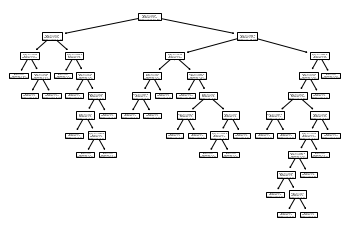

In [51]:
tree.plot_tree(mydt)
plt.show()

**Note:** This visualization is rather complicated.  We show how to address this with max_depth below, **but** it also points to a problem of overfitting in decision trees.  You can make a decision tree as complicated as you want--so that it fits your (training) data perfectly, but that doesn't mean it will do better on the test data.  We address *this* problem below.

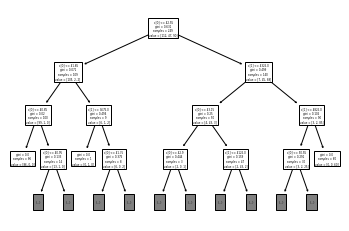

In [52]:
tree.plot_tree(mydt, max_depth=3)
plt.show()

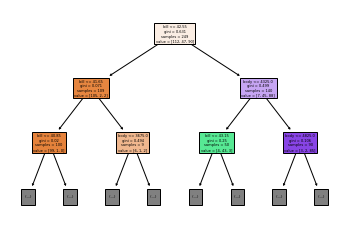

In [53]:
tree.plot_tree(mydt, max_depth=2, feature_names = ['bill','body'], filled = True )
plt.show()

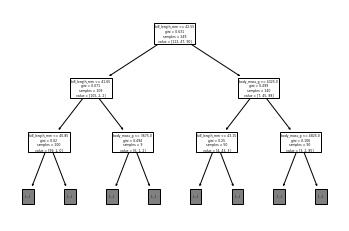

In [54]:
tree.plot_tree(mydt, max_depth=2, feature_names = train_X.columns)
plt.show()

### Another Decision Tree Example ###

Note the use of max_depth and min_samples_split.  This prevents the tree from getting too complicated.

In [55]:
mydt3 = tree.DecisionTreeClassifier(max_depth=3, min_samples_split = 3)
mydt3.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [56]:
mypredict3 = mydt3.predict(test_X)

In [57]:
confusion_matrix(mypredict3, test_y)

array([[30,  0,  1],
       [ 3, 18,  3],
       [ 1,  3, 25]])

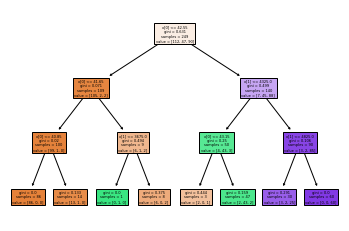

In [58]:
tree.plot_tree(mydt3, filled = True)
plt.show()

# Ensemble Methods #

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Basic Question: How to improve decision trees? ###

+ They suffer from overfitting to the given training set
+ There is always room to improve in accuracy
+ How did we improve linear and logistic regression?
+ The techniques for improving decision trees rely on having access to computational power


An **ensemble learning method** combines several different learning algorithms which solve the same task (classifier, regression) to improve the outcome of a single model. (These may even be the same *type* of model.)